## Выбрать данные

Откроем файл из прошлого ДЗ (список друзей ВК)

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('friends.csv', index_col=[0])
df.head()

,bdate,city,country,deactivated,domain,education_form,education_status,faculty,faculty_name,first_name,...,relation,relation_partner,sex,status,status_audio,uid,universities,university,university_name,user_id
0,22.12,2.0,1.0,NaN,denis_leonidovich,NaN,NaN,NaN,NaN,Denis,...,NaN,NaN,2,"Мечтайте так, как будто вам жить вечно. Живите...",NaN,2885,NaN,NaN,NaN,2885
1,7.2,138.0,1.0,NaN,anechka_bulatova,NaN,NaN,NaN,NaN,Anna,...,NaN,NaN,1,NaN,NaN,28269,NaN,NaN,NaN,28269
2,19.2.1987,138.0,1.0,NaN,id40338,NaN,NaN,NaN,NaN,Alexandra,...,NaN,NaN,1,NaN,NaN,40338,NaN,NaN,NaN,40338
3,20.11.1986,2.0,1.0,NaN,yana_ring,NaN,NaN,341.0,Факультет социальных технологий,Yana,...,4.0,"{'id': 3314750, 'first_name': 'Dmitry', 'last_...",1,NaN,NaN,54645,"[{'id': 81, 'country': 1, 'city': 2, 'name': '...",81.0,СЗИУ РАНХиГС (бывш. СЗАГС),54645
4,21.12.1985,138.0,1.0,NaN,vtyurin_nikita,NaN,NaN,NaN,NaN,Nikita,...,NaN,NaN,2,NaN,NaN,58194,NaN,NaN,NaN,58194


## Составить список вопросов, по которым хотелось бы получить ответ в виде графиков

1. Процентное соотношение мужчин и женщин
2. Распределение по возрасту
3. Процентное соотношение онлайн и оффлайн
4. Процентное соотношение женатых (замужних) и не женатых (не замужних)
5. Распределение по странам
6. Распределением кол-ва людей с высшим образованием по городам и по возрастам 

In [53]:
df.columns

Index(['bdate', 'city', 'country', 'deactivated', 'domain', 'education_form',
       'education_status', 'faculty', 'faculty_name', 'first_name',
       'graduation', 'has_mobile', 'hidden', 'home_phone', 'last_name',
       'last_seen', 'online', 'online_app', 'online_mobile', 'relation',
       'relation_partner', 'sex', 'status', 'status_audio', 'uid',
       'universities', 'university', 'university_name', 'user_id'],
      dtype='object')

* Процентное соотношение мужчин и женщин

([<matplotlib.patches.Wedge at 0x1a1ad9e828>,
 [Text(-0.963604,0.530535,'female'),
  Text(0.963271,-0.53114,'male'),
  Text(1.1,-0.000691174,'unknown')],
 [Text(-0.525602,0.289383,'84.0%'),
  Text(0.52542,-0.289713,'16.0%'),
  Text(0.6,-0.000377004,'0.0%')])

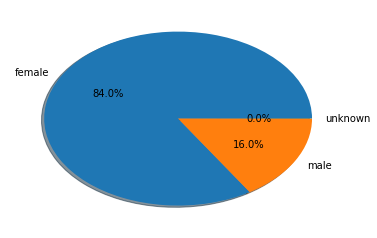

In [54]:
# Поменяем цифровые значения пола в текстовый вид
for n, v in enumerate(('unknown', 'female', 'male')):
    df.loc[df['sex'] == n, 'sex'] = v

df2 = df['sex'].value_counts()

plt.subplot()
plt.pie(df2, autopct='%1.1f%%', labels=df2.index, shadow=True)

* Распределение по возрасту

Text(0,0.5,'Numbers')

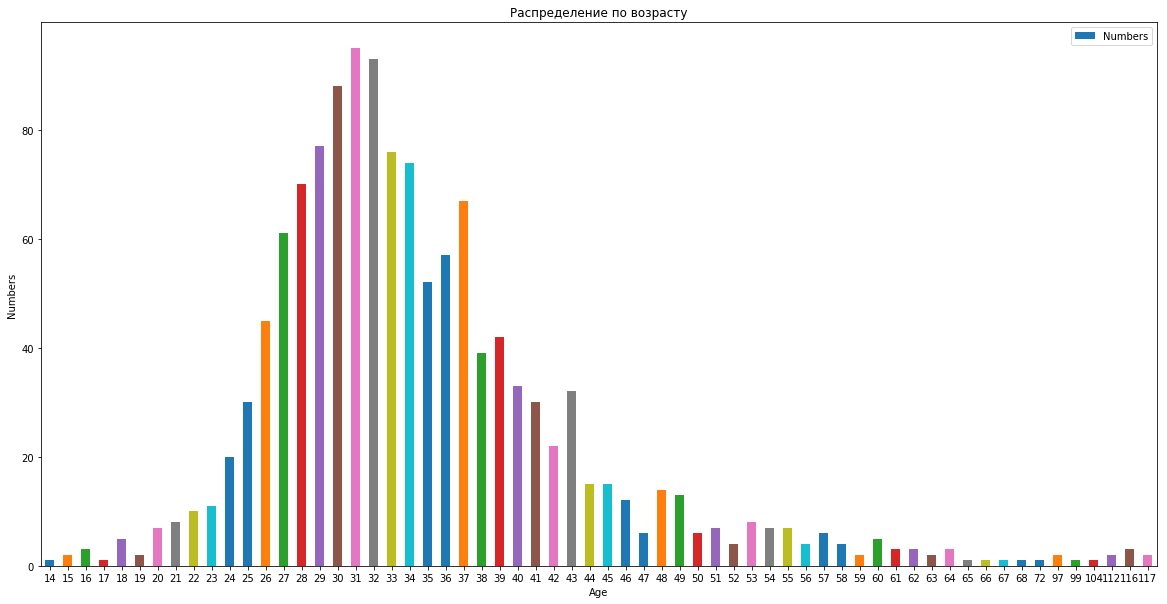

In [55]:
from datetime import date

# Преобразуем даты рождения (у тех, у кого они есть) в возрасты
for i, d in enumerate(df['bdate']):
    if isinstance(d, str):
        bdate = d.split('.')
        if len(bdate) == 3:
            bdate = date(int(bdate[-1]), int(bdate[-2]), int(bdate[-3]))
            today = date.today()
            age = today.year - bdate.year
            if today.month < bdate.month:
                age -= 1
            elif today.month == bdate.month and today.day < bdate.day:
                age -= 1
            df.at[i, 'bdate'] = age
        else:
            df.at[i, 'bdate'] = 0  
    else:
        df.at[i, 'bdate'] = 0
        
df['bd_count'] = 1
                
df[df['bdate'] > 0].groupby(['bdate'], as_index=False).count().plot.bar('bdate', 'bd_count', figsize=(20, 10), rot=0, title='Распределение по возрасту', label='Numbers')
plt.xlabel('Age')
plt.ylabel('Numbers')

Отобразим подобный график, но с разбиением по полу:

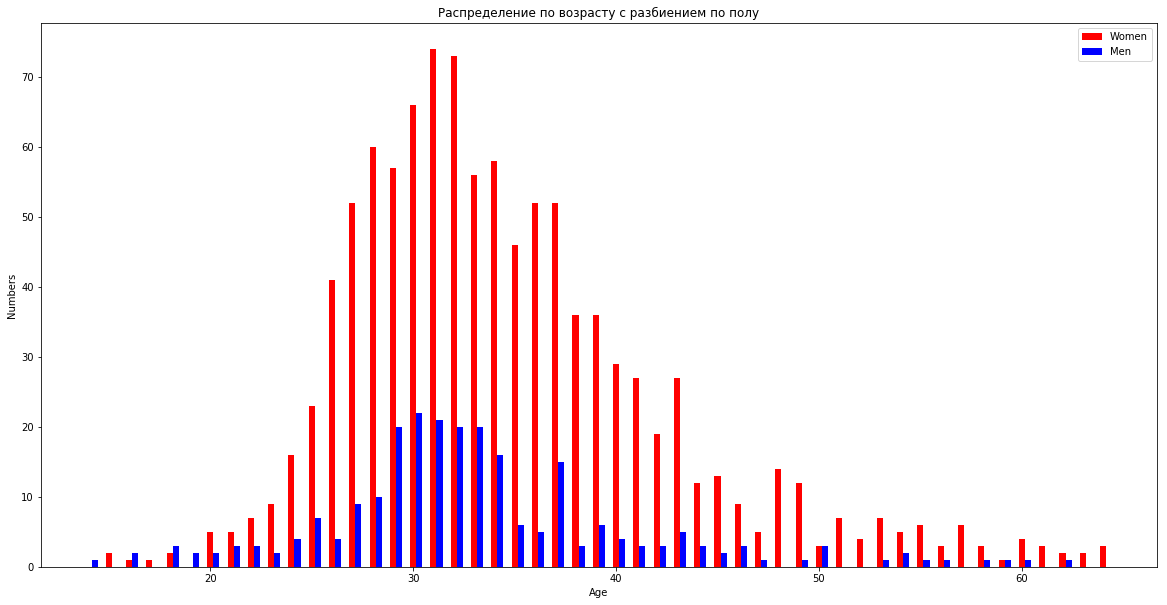

In [56]:
df_ = df[df['bdate'] > 0].groupby(['sex', 'bdate'], as_index=False).count()
df_f = df_[df_['sex'] == 'female']
df_m = df_[df_['sex'] == 'male']

df_f = df_f[df_f['bdate'] < 65]
df_m = df_m[df_m['bdate'] < 65]

fig, ax = plt.subplots(1, 1, figsize=(20, 10))
bar_width = 0.3

women_bar = ax.bar(df_f['bdate'], df_f['bd_count'], bar_width,
                 color='r',
                 label='Women')

men_bar = ax.bar(df_m['bdate'] + bar_width, df_m['bd_count'], bar_width,
                 color='b',
                 label='Men')
                        
ax.set_xlabel('Age')
ax.set_ylabel('Numbers')
ax.set_title('Распределение по возрасту с разбиением по полу')
ax.legend()


* Процентное соотношение онлайн и оффлайн

([<matplotlib.patches.Wedge at 0x1a1c4e3390>,
 [Text(-1.06747,0.265518,'offline'), Text(1.06747,-0.265518,'online')],
 [Text(-0.582258,0.144828,'92.2%'), Text(0.582258,-0.144828,'7.8%')])

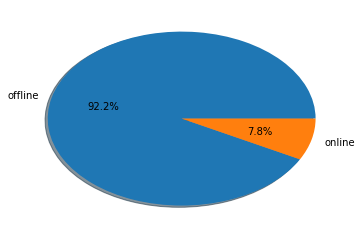

In [57]:
online = len(df[df['online'] == 1])
offline = len(df[df['online'] == 0])
df4 = pd.DataFrame({'online': online, 'offline': offline}, index=['count'])

plt.subplot()
plt.pie(df4.T, autopct='%1.1f%%', labels=['offline', 'online'], shadow=True)

* Процентное соотношение женатых (замужних) и не женатых (не замужних)

([<matplotlib.patches.Wedge at 0x1a1c54c400>,
 [Text(1.04638,0.339261,'married'), Text(-1.04638,-0.339261,'single')],
 [Text(0.57075,0.185052,'10.0%'), Text(-0.57075,-0.185052,'90.0%')])

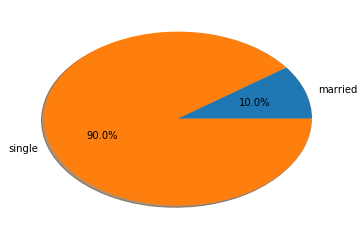

In [58]:
married = len(df[df['relation'] == 4])
single = len(df[df['relation'] != 4])
df5 = pd.DataFrame({'married': married, 'single': single}, index=['count'])

plt.subplot()
plt.pie(df5.T, autopct='%1.1f%%', labels=['married', 'single'], shadow=True)

* Распределение по странам

/Users/andrejpopov/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


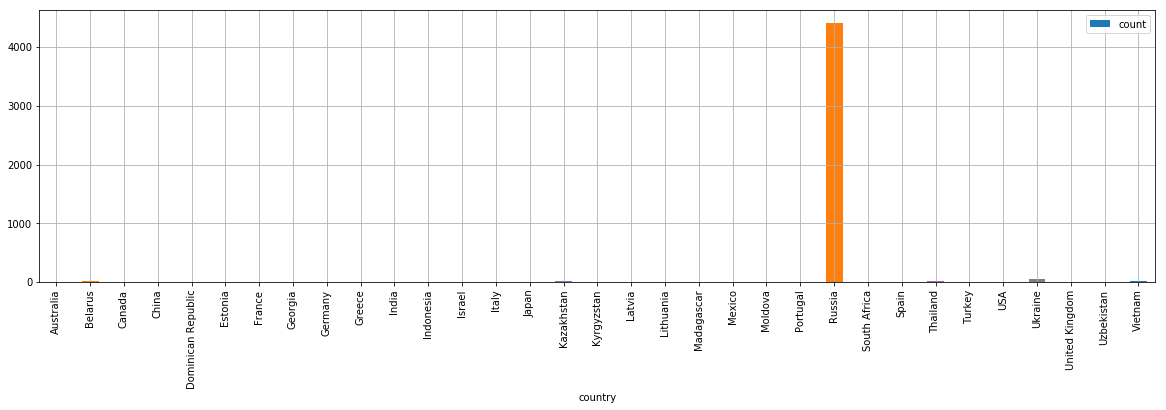

In [59]:
# Необходимо поменять в датафрейме буквенные значения стран в названия
# Для этого достанем список стран с их id и названием с помощью VK API

import vk

session = vk.Session()
vk_api = vk.API(session, timeout=10)
countries = vk_api.database.getCountries(v='5.0', need_all=1, count=1000)

for country in countries['items']:
    country_id = country['id']
    df.loc[df['country'] == country_id, 'country'] = country['title']

df6 = df.dropna(subset=['country'], how='all', inplace = True)
df6 = df[df['country'] != 0]
df6['count'] = 1
df6.groupby('country', as_index=False).count().plot.bar(x='country', y='count', figsize=(20, 5), grid=True)

Отобразим распределение по странам без РФ

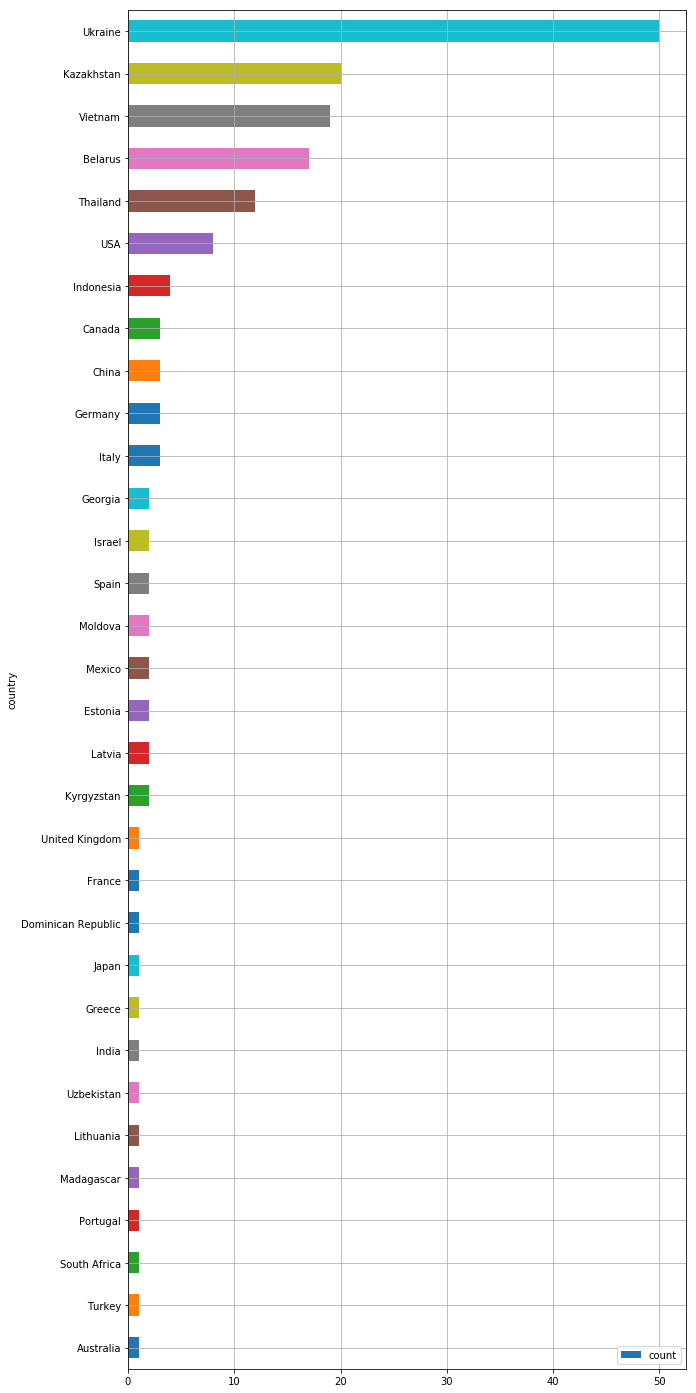

In [60]:
df7 = df6[df6['country'] != 'Russia'].groupby('country', as_index=False).count()
df7.sort_values('count', ascending=True)[['country','count']].plot.barh(x='country', y='count', figsize=(10, 25), grid=True)


* Распределением кол-ва людей с высшим образованием по городам и по возрастам 

/Users/andrejpopov/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/andrejpopov/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Text(114,0.5,'City')

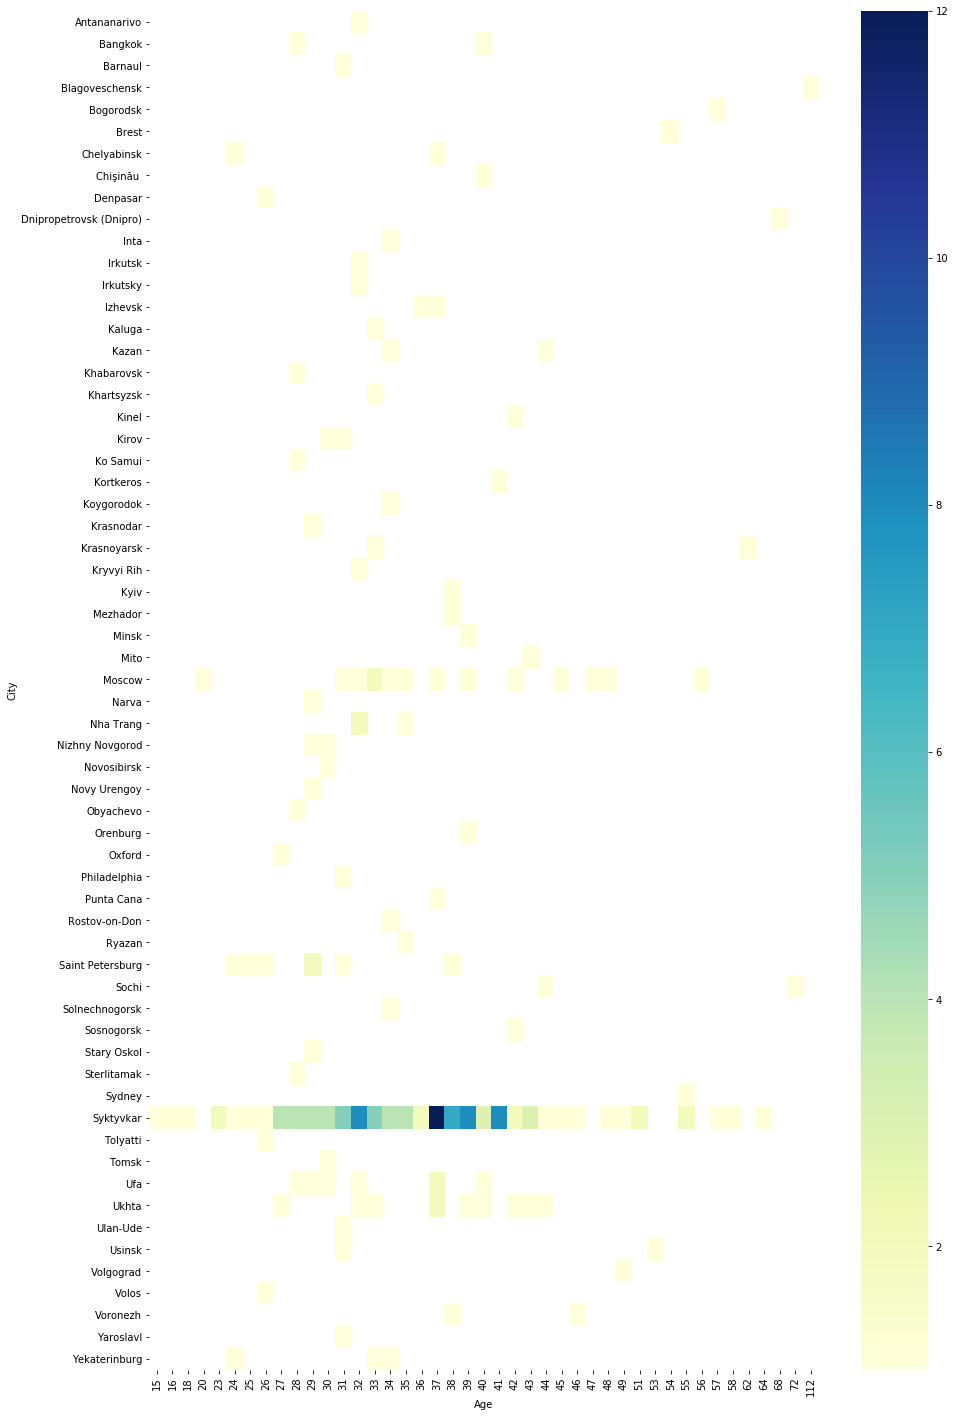

In [61]:
import seaborn as sns

# Оставим только тех, кто указал информацию о высшем образовании
df8 = df[df['university'] > 0]
df8['city'] = df8['city'].astype('str')

# Множество из всех id городов
city_ids = set()
[city_ids.add(city_id) for city_id in df8['city']]

# С помощью VK API достанем список городов по их id
cities = vk_api.database.getCitiesById(v='5.0', city_ids=city_ids)

# Поменяем в датафрейме id городов на название
for city in cities:
    df8.loc[df8['city'] == str(city['id']) + '.0', 'city'] = city['title']

# Оставим только нужные колонки и тех, у кого есть возраст
df9 = df8[df8['bdate'] > 0].loc[:, ['city', 'bdate']]
df9['count'] = 1
df9 = df9[df9['city'] != '0.0'].groupby(['city', 'bdate'], as_index=False).count()

# Визуализация
fig, ax = plt.subplots(1, 1, figsize=(15, 25))
ax = sns.heatmap(df9.pivot("city", "bdate", "count"), cmap="YlGnBu")
plt.xlabel('Age')
plt.ylabel('City')